Final exam : IE7374 Sensor Analytics in Engineering System
Raja Muthu
001050952

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as sc
import scipy.signal as sg
import scipy.stats as st
import warnings
from scipy.ndimage.filters import uniform_filter1d
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit

In [2]:
os.chdir('Vibration_dataset')
DIR = os.listdir()

In [3]:
df= (DIR[0].split('-')[1]).split('.')[0]
df=pd.DataFrame(pd.read_csv(DIR[0],names=[df],skiprows=1))
for file in DIR:
    name = (file.split('-')[1]).split('.')[0]
    csv = pd.DataFrame(pd.read_csv(file,names=[name],skiprows=1))
    df=df.merge(csv,left_index=True,right_index=True,how='inner')
df=df.drop(columns={'20130307T015746Z_y'}).rename(columns={'20130307T015746Z_x':'20130307T015746Z'})
df

,20130307T015746Z,20130308T023421Z,20130309T023343Z,20130310T030102Z,20130311T030024Z,20130312T061710Z,20130313T063404Z,20130314T065041Z,20130315T065003Z,20130316T065643Z,...,20130416T230159Z,20130417T230120Z,20130418T230803Z,20130419T230747Z,20130420T151307Z,20130421T151231Z,20130422T151908Z,20130423T151830Z,20130424T215514Z,20130425T232202Z
0,-0.414619,0.474068,1.039888,4.649311,1.952522,-0.043846,-0.692040,-4.326567,0.404417,-0.547078,...,1.222014,2.444987,2.724981,0.448374,-2.186443,-2.388492,0.187700,-2.741766,-1.042165,0.178114
1,0.172490,0.594640,-0.517298,5.189054,2.401523,-0.904635,-2.198072,-2.553611,2.595819,-3.122125,...,1.470246,2.654641,3.533176,1.495940,-1.487043,-1.149016,0.828819,-2.420942,-0.403974,1.728471
2,-0.403777,1.403069,0.666161,1.300168,1.930716,-0.114591,-3.635917,-1.933030,1.607406,-4.310298,...,3.191321,1.735989,3.057212,0.870327,-0.712640,1.490920,1.089050,-1.302260,1.689252,1.039679
3,-0.773542,1.377042,1.033624,-1.904185,0.984906,-0.391718,-1.855540,-0.114518,1.898032,-2.921049,...,3.685152,-0.520916,2.759043,-0.825324,-0.110580,4.800179,2.051473,-1.134335,3.281326,-0.549490
4,0.686626,-0.244885,1.623256,-3.311154,1.287284,0.088097,-0.030568,0.158203,0.299104,-0.918947,...,3.545617,-0.742039,0.386771,-1.519531,0.147473,3.828736,2.821064,-1.658697,3.282827,-0.872086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585931,2.533995,0.389207,3.300239,-2.821212,5.040573,-1.911568,0.433668,-2.257349,0.319987,1.037415,...,1.192123,-0.530687,1.932599,-1.286951,-1.771245,3.779968,-0.552357,2.149968,1.696070,-0.504045
585932,2.781071,1.376390,4.782840,-1.501109,0.991219,-3.149838,0.189743,-0.028746,-0.049432,1.128945,...,-2.206120,-0.474450,3.970868,-2.201468,0.771314,3.006833,-1.630726,1.892482,1.105207,-0.376828
585933,2.177312,2.174765,4.798629,-0.707078,-0.382378,-1.714307,1.197685,3.533508,0.091789,0.204301,...,-4.799564,0.239188,0.669176,-0.385208,2.068652,0.968687,-1.764034,-0.537984,1.200712,-1.153175
585934,-1.481063,2.201308,2.822196,-0.846933,-0.242030,-1.132255,-0.683426,4.250529,0.031614,1.178648,...,-3.237554,0.123809,0.278098,0.236123,1.081642,-2.857563,-3.733551,-1.087905,0.121421,1.648594


In [4]:
DF=df.filter(items = np.linspace(0,df.shape[0],round(df.shape[0]/10),dtype=int), axis=0)

In [5]:
DF

,20130307T015746Z,20130308T023421Z,20130309T023343Z,20130310T030102Z,20130311T030024Z,20130312T061710Z,20130313T063404Z,20130314T065041Z,20130315T065003Z,20130316T065643Z,...,20130416T230159Z,20130417T230120Z,20130418T230803Z,20130419T230747Z,20130420T151307Z,20130421T151231Z,20130422T151908Z,20130423T151830Z,20130424T215514Z,20130425T232202Z
0,-0.414619,0.474068,1.039888,4.649311,1.952522,-0.043846,-0.692040,-4.326567,0.404417,-0.547078,...,1.222014,2.444987,2.724981,0.448374,-2.186443,-2.388492,0.187700,-2.741766,-1.042165,0.178114
10,0.287795,1.700512,-1.229705,2.045357,-0.451302,-0.526798,1.781324,-3.056843,2.916976,0.989594,...,-2.498394,1.216698,0.805500,-3.141839,-3.851846,-0.208866,-1.593353,-1.480386,-1.538334,2.420142
20,-1.176261,-0.942586,2.598822,1.282103,-1.214827,3.090844,1.870233,0.581202,4.384613,-1.781016,...,-1.167893,0.980980,2.383951,2.090236,-1.161359,1.950282,-1.563413,-0.873034,-1.752959,-0.094422
30,1.878404,-1.913500,1.877494,2.554878,-3.076619,-0.732871,-1.079660,2.243702,2.739169,1.719364,...,2.175811,0.523377,4.292861,5.325821,-2.324194,0.070758,0.657978,-0.288386,-0.427552,-4.581370
40,1.215246,0.218095,-1.322453,-0.066537,-1.233237,1.425379,-2.279782,2.776099,0.080824,3.698787,...,0.197840,-0.730742,0.352278,0.066181,0.498950,1.098833,-0.187983,-1.051689,2.028941,0.536828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585885,-4.099217,2.910294,2.933416,1.718072,-2.287732,2.505397,1.557273,2.600348,1.970525,0.805918,...,0.362528,0.802116,2.296272,0.978950,3.552877,1.154061,-0.680781,-0.403876,0.944838,4.580742
585895,-2.303557,3.319965,0.641574,0.438271,-4.043657,-0.990640,2.220813,3.086906,2.099527,0.588610,...,1.642379,-0.326534,0.668807,0.567211,3.150958,0.314511,2.206784,-1.568360,2.130587,2.448236
585905,-1.186598,1.854174,1.128034,-0.515231,0.386254,0.598012,2.584153,6.015105,0.701971,4.873411,...,0.100268,-4.589295,-2.500757,4.491562,-0.877562,2.753690,1.061731,-2.569067,2.969755,2.677197
585915,-2.083825,0.316529,1.124010,1.387182,-0.507466,1.117525,1.252507,4.924726,3.774098,-2.318927,...,-4.709313,-3.390810,-1.381755,0.688496,3.197609,-0.640172,-0.702377,-0.765678,0.037496,3.853704


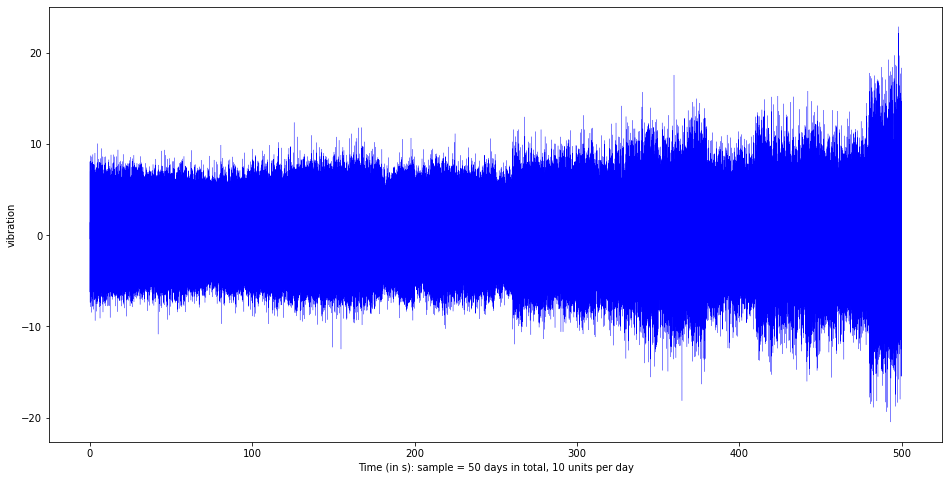

<Figure size 432x288 with 0 Axes>

In [6]:
fs = int(df.shape[0]/(24*60*60))
t = np.linspace(0.0,10,DF.shape[0])
fig = plt.figure(figsize = (16.0,8))
for i in range(DF.shape[1]):
      plt.plot(t + i * 10.0,DF.iloc[:,i],color = 'blue',lw = 0.25)

plt.xlabel('Time (in s): sample = 50 days in total, 10 units per day')
plt.ylabel('vibration')
plt.show()
#plt.savefig('C:/Users/Rajam/OneDrive/Documents/Raja/Fall-2021/Final_exam/timeseries_plot.png',bbox_inches ='tight')

In [7]:
Mean= pd.DataFrame(np.mean(DF))
Std = np.std(DF)
Skew=st.skew(DF)
Kurtosis = st.kurtosis(DF,fisher=False)
PTP=np.array([np.ptp(DF.iloc[:,i]) for i in range(DF.shape[1])])
RMS = np.sqrt(np.mean(DF**2))
peak_level = np.array([abs(DF.iloc[:,i]).max() for i in range(DF.shape[1])])
crest_factor = peak_level / RMS
Shape_factor=RMS/np.mean(abs(DF))
Impulse_factor= np.array([DF.iloc[:,i].max() for i in range(DF.shape[1])])/np.mean(abs(DF))

In [8]:
f = []
fft = []
wnd =127
for i in range(DF.shape[1]):
    freq,time,transform = sg.stft(DF.iloc[:,i],fs,nperseg = wnd,noverlap = int(0.8 * wnd),nfft = int(2.0 * wnd))
    f.append(freq)
    fft.append(st.kurtosis(np.abs(transform),fisher = False,axis = 1))
    #print(w)
f = np.asarray(f)
fft = np.asarray(fft)

fftn = (fft - fft.min()) / (fft.max() - fft.min())

fftn = np.asarray(fftn)
n = np.ones_like(f[0])

SK=pd.DataFrame(fftn).T
SKMean=np.mean(SK)
SKStd= np.std(SK)
SKSkew=st.skew(SK)
SKKurtosis = st.kurtosis(SK,fisher=False)

In [9]:
Data =Mean.rename(columns ={0 :'Mean'})
Data['Std']=Std
Data['Skew']=Skew
Data['Kurtosis'] =Kurtosis
Data['PTP'] =PTP
Data['RMS'] = RMS
Data['peak_level']=peak_level
Data['crest_factor']=crest_factor
Data['Shape_factor'] = Shape_factor
Data['Impulse_factor'] = Impulse_factor
Data['SKmean']=np.array(SKMean)
Data['SKStd']=np.array(SKStd)
Data['SKSkew']=SKSkew
Data['SKKurtosis']=SKKurtosis

In [10]:
DataSmooth = []
for i in range (Data.shape[1]):
    smooth=uniform_filter1d(Data.iloc[:,i], size=5)
    DataSmooth.append(smooth)

DataSmooth=pd.DataFrame(DataSmooth).set_index(Data.columns.values).T

In [11]:
Data=Data.reset_index()
Data['index']=pd.to_datetime(Data['index']).dt.date
display(Data)

,index,Mean,Std,Skew,Kurtosis,PTP,RMS,peak_level,crest_factor,Shape_factor,Impulse_factor,SKmean,SKStd,SKSkew,SKKurtosis
0,2013-03-07,0.321013,2.269472,0.000720,2.991160,19.409116,2.292063,10.048498,4.384042,1.252075,5.489150,0.238105,0.096765,1.063853,5.336596
1,2013-03-08,0.268887,2.063321,0.000641,3.037444,18.392978,2.080768,9.363853,4.500191,1.254201,5.644143,0.230731,0.078208,0.962935,4.039930
2,2013-03-09,0.234423,2.115649,0.027131,3.011560,17.764792,2.128597,8.886930,4.175017,1.253416,5.227691,0.235383,0.092128,0.568639,3.382385
3,2013-03-10,0.207875,2.012476,-0.009111,3.031019,16.939528,2.023184,8.649355,4.275121,1.254077,5.361331,0.243238,0.083882,0.574446,2.911858
4,2013-03-11,0.206956,2.065587,-0.013861,3.050628,20.199430,2.075929,10.846172,5.224731,1.254460,5.652064,0.262476,0.072699,0.483189,3.429426
5,2013-03-12,0.285362,2.078545,-0.021603,3.026212,17.072653,2.098042,8.652333,4.124004,1.252813,5.166607,0.235702,0.101953,1.227398,6.155595
6,2013-03-13,0.217214,1.972824,-0.009038,3.029798,17.229318,1.984746,9.316033,4.693816,1.253044,5.881558,0.226932,0.090346,1.239413,5.119716
7,2013-03-14,0.230232,1.800461,0.018552,3.039625,16.191793,1.815122,8.690420,4.787789,1.254973,6.008547,0.260258,0.096663,0.858116,3.969958
8,2013-03-15,0.229089,1.995320,-0.011901,3.116340,19.602206,2.008428,9.889336,4.923918,1.258573,6.197113,0.246896,0.107736,0.846514,3.724266
9,2013-03-16,0.255758,1.989512,-0.011640,3.002103,17.423344,2.005884,9.047422,4.510442,1.253227,5.652609,0.244450,0.102715,1.103885,4.043377


In [12]:
DataSmooth['index']=Data['index']
display(DataSmooth)

,Mean,Std,Skew,Kurtosis,PTP,RMS,peak_level,crest_factor,Shape_factor,Impulse_factor,SKmean,SKStd,SKSkew,SKKurtosis,index
0,0.282845,2.156247,0.005971,3.013754,18.673796,2.174852,9.542327,4.388696,1.253194,5.498856,0.234611,0.088415,0.924443,4.427087,2013-03-07
1,0.270642,2.146078,0.004020,3.012468,18.383106,2.163335,9.399427,4.343683,1.253169,5.442293,0.237112,0.089550,0.846745,4.201473,2013-03-08
2,0.247831,2.105301,0.001104,3.024362,18.541169,2.120108,9.558962,4.511820,1.253646,5.474876,0.241986,0.084736,0.730612,3.820039,2013-03-09
3,0.240701,2.067116,-0.003361,3.031373,18.073876,2.081304,9.279729,4.459813,1.253793,5.410367,0.241506,0.085774,0.763321,3.983839,2013-03-10
4,0.230366,2.049016,-0.005296,3.029843,17.841144,2.062100,9.270165,4.498538,1.253562,5.457850,0.240746,0.088202,0.818617,4.199796,2013-03-11
5,0.229528,1.985979,-0.007012,3.035456,17.526545,1.999404,9.230863,4.621092,1.253873,5.614021,0.245721,0.089109,0.876512,4.317310,2013-03-12
6,0.233771,1.982547,-0.007570,3.052521,18.059080,1.996453,9.478859,4.750852,1.254773,5.781178,0.246453,0.093879,0.930926,4.479792,2013-03-13
7,0.243531,1.967332,-0.007126,3.042816,17.503863,1.982444,9.119109,4.607994,1.254526,5.781287,0.242848,0.099883,1.055065,4.602582,2013-03-14
8,0.233053,1.972901,-0.006094,3.061446,17.925624,1.986683,9.332427,4.700405,1.255514,5.871155,0.247441,0.099572,0.922996,3.984794,2013-03-15
9,0.232149,2.003749,-0.001988,3.075893,18.327455,2.017267,9.507575,4.715182,1.256568,5.894697,0.260818,0.105332,0.899768,3.985917,2013-03-16


In [13]:
Data.melt(id_vars=['index'],var_name='Metrics',value_name='Value')

,index,Metrics,Value
0,2013-03-07,Mean,0.321013
1,2013-03-08,Mean,0.268887
2,2013-03-09,Mean,0.234423
3,2013-03-10,Mean,0.207875
4,2013-03-11,Mean,0.206956
...,...,...,...
695,2013-04-21,SKKurtosis,4.781006
696,2013-04-22,SKKurtosis,3.994624
697,2013-04-23,SKKurtosis,7.181821
698,2013-04-24,SKKurtosis,5.749797


In [14]:
Datamelt=Data.melt(id_vars=['index'],var_name='Metrics',value_name='Value')
DataSmoothmelt=DataSmooth.melt(id_vars={'index'},var_name='Metrics',value_name='Value')
Datamelt['label'] ='Raw'
DataSmoothmelt['label'] ='Smoothed'

In [15]:
t=(DataSmoothmelt,Datamelt)

Combined=pd.concat(t)

In [16]:
Combined

,index,Metrics,Value,label
0,2013-03-07,Mean,0.282845,Smoothed
1,2013-03-08,Mean,0.270642,Smoothed
2,2013-03-09,Mean,0.247831,Smoothed
3,2013-03-10,Mean,0.240701,Smoothed
4,2013-03-11,Mean,0.230366,Smoothed
...,...,...,...,...
695,2013-04-21,SKKurtosis,4.781006,Raw
696,2013-04-22,SKKurtosis,3.994624,Raw
697,2013-04-23,SKKurtosis,7.181821,Raw
698,2013-04-24,SKKurtosis,5.749797,Raw


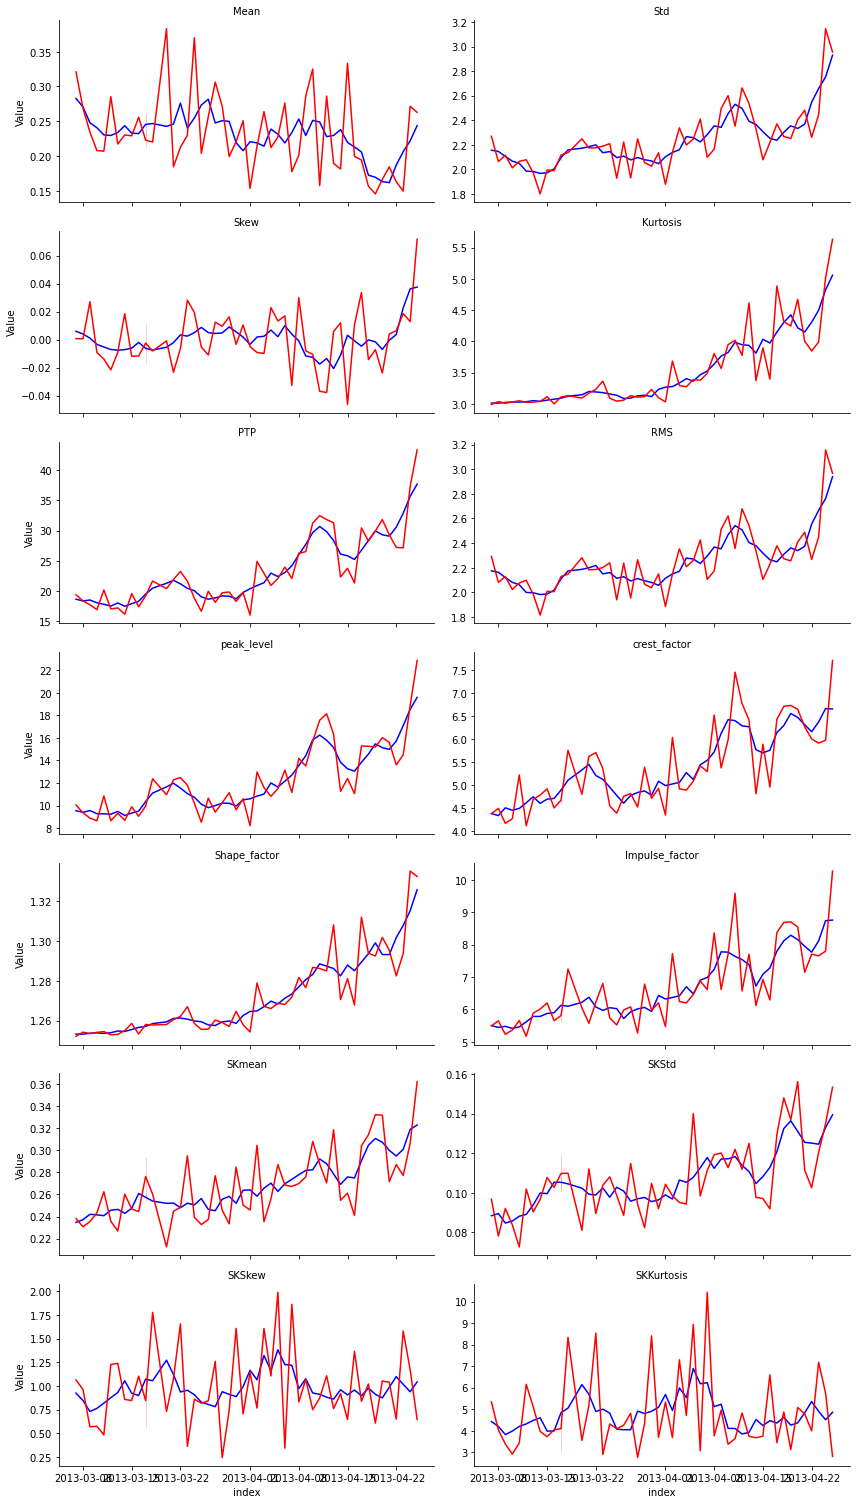

In [17]:
palette ={'red','blue'}
g=sns.FacetGrid(data=Combined,hue='label',col='Metrics',palette=palette,col_wrap=2,sharey=False,height=3,aspect=2)
g.map(sns.lineplot,'index','Value')
g.set_titles("{col_name}")
#plt.savefig('C:/Users/Rajam/OneDrive/Documents/Raja/Fall-2021/Final_exam/Smoothing.png',bbox_inches ='tight')

In [18]:
DataSmooth=DataSmooth.set_index('index')
DataSmooth = pd.DataFrame(st.zscore(DataSmooth),columns=DataSmooth.columns.values, index=DataSmooth.index)
DataSmooth

,Mean,Std,Skew,Kurtosis,PTP,RMS,peak_level,crest_factor,Shape_factor,Impulse_factor,SKmean,SKStd,SKSkew,SKKurtosis
index,,,,,,,,,,,,,,
2013-03-07,1.861589,-0.376269,0.524906,-0.945109,-0.886274,-0.350143,-0.995415,-1.398384,-1.021305,-1.240722,-1.462706,-1.378982,-0.401603,-0.485878
2013-03-08,1.416528,-0.426649,0.340901,-0.947507,-0.942245,-0.407675,-1.048812,-1.461970,-1.022664,-1.300558,-1.351467,-1.295238,-0.953237,-0.810086
2013-03-09,0.584524,-0.628665,0.065804,-0.925310,-0.911811,-0.623610,-0.989200,-1.224459,-0.996492,-1.266090,-1.134715,-1.650399,-1.777750,-1.358207
2013-03-10,0.324460,-0.817843,-0.355381,-0.912226,-1.001786,-0.817452,-1.093539,-1.297925,-0.988394,-1.334332,-1.156086,-1.573841,-1.545525,-1.122827
2013-03-11,-0.052473,-0.907511,-0.537999,-0.915080,-1.046598,-0.913386,-1.097112,-1.243222,-1.001091,-1.284101,-1.189873,-1.394712,-1.152941,-0.812496
2013-03-12,-0.083045,-1.219812,-0.699854,-0.904605,-1.107173,-1.226574,-1.111798,-1.070102,-0.983994,-1.118890,-0.968632,-1.327789,-0.741898,-0.643628
2013-03-13,0.071705,-1.236811,-0.752496,-0.872757,-1.004635,-1.241316,-1.019131,-0.886804,-0.934637,-0.942059,-0.936099,-0.975767,-0.355576,-0.410142
2013-03-14,0.427697,-1.312189,-0.710601,-0.890869,-1.111540,-1.311296,-1.153556,-1.088605,-0.948163,-0.941943,-1.096418,-0.532799,0.525780,-0.233692
2013-03-15,0.045512,-1.284600,-0.613276,-0.856099,-1.030332,-1.290125,-1.073847,-0.958066,-0.893975,-0.846874,-0.892158,-0.555686,-0.411875,-1.121455


In [19]:
#Perform PCA
n_components = 14
pca = PCA(n_components=n_components, svd_solver= 'full')

PCA_values=pd.DataFrame(pca.fit_transform(DataSmooth))
columns = ["PC{}".format(i+1)  for i in range(len(PCA_values.columns))]
PCA_values.columns=columns
PCA_values=PCA_values.reset_index()

<Figure size 576x576 with 0 Axes>

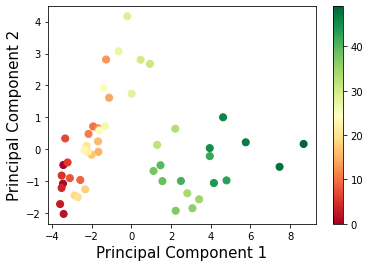

In [20]:
#PCA plot on Training Data
fig = plt.figure(figsize = (8,8))
f, ax = plt.subplots()
points = ax.scatter(PCA_values['PC1'], PCA_values['PC2'], c=PCA_values['index'], s=50, cmap='RdYlGn')
f.colorbar(points)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#plt.savefig('C:/Users/Rajam/OneDrive/Documents/Raja/Fall-2021/Final_exam/PCA_plot.png',bbox_inches='tight')

[0.697 0.14  0.089 0.05  0.012 0.006 0.003 0.002 0.001 0.001 0.    0.
 0.    0.   ]


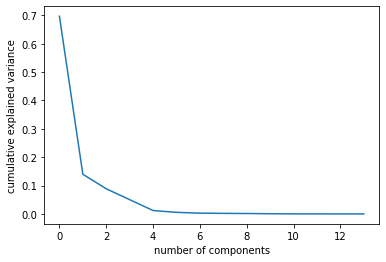

In [21]:
#variance captured by PCs
np.set_printoptions(precision=3, suppress=True)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.savefig('C:/Users/Rajam/OneDrive/Documents/Raja/Fall-2021/Final_exam/PCA_expalined_variance.png',bbox_inches ='tight')

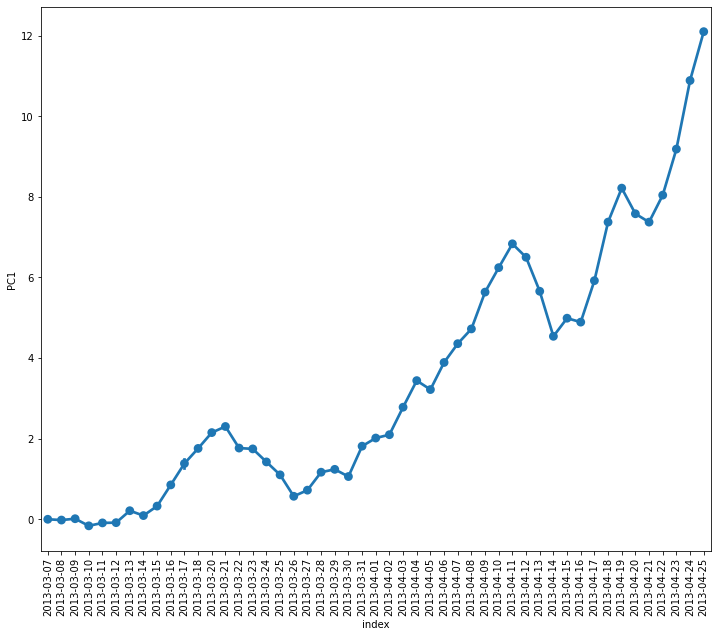

In [22]:
Health_indictor=pd.DataFrame(Data['index'])
Health_indictor['PC1']=PCA_values['PC1']
Health_indictor['PC1']=Health_indictor['PC1']-Health_indictor.loc[0:0,'PC1'].values[0]
fig = plt.figure(figsize = (12,10))
g=sns.pointplot(data=Health_indictor,y='PC1',x='index')
g.set_xticklabels(g.get_xticklabels(),rotation = 90)
#plt.savefig('C:/Users/Rajam/OneDrive/Documents/Raja/Fall-2021/Final_exam/Degradation.png',bbox_inches ='tight')

In [23]:
np.array(Health_indictor['PC1'])

array([ 0.   , -0.019,  0.014, -0.163, -0.09 , -0.084,  0.213,  0.092,
        0.327,  0.853,  1.5  ,  1.268,  1.758,  2.151,  2.303,  1.767,
        1.747,  1.423,  1.103,  0.571,  0.723,  1.168,  1.239,  1.06 ,
        1.814,  2.016,  2.099,  2.781,  3.441,  3.219,  3.891,  4.358,
        4.724,  5.637,  6.244,  6.836,  6.502,  5.658,  4.54 ,  4.99 ,
        4.893,  5.921,  7.375,  8.217,  7.582,  7.374,  8.044,  9.186,
       10.888, 12.1  ])

In [24]:
def monoExp(t, phi, theta, beta):
    return  phi+theta * np.exp(-t*beta)

In [25]:
Health_indictor['days']=np.linspace(0, 49, round(50),dtype=int)
g=[1,1,-1]

In [26]:
#Threshhold at 80%
Health_indictor['PC1'].max()*0.8

9.680130612807393

In [27]:
data20=Health_indictor.head(20)
n=Health_indictor.shape[0]
y_pred20=np.empty(n)
for i in range(n):
    c,cov=curve_fit(monoExp,data20['days'],data20['PC1'],g,maxfev = 1000)
    g=c
    y_pred20[i]=monoExp(Health_indictor.loc[i,'days'],c[0],c[1],c[2])
print(y_pred20)
print(g)

[-0.186 -0.078  0.029  0.137  0.245  0.352  0.46   0.568  0.675  0.783
  0.89   0.998  1.106  1.213  1.321  1.429  1.536  1.644  1.751  1.859
  1.967  2.074  2.182  2.29   2.397  2.505  2.613  2.72   2.828  2.936
  3.043  3.151  3.259  3.366  3.474  3.582  3.689  3.797  3.905  4.012
  4.12   4.228  4.336  4.443  4.551  4.659  4.766  4.874  4.982  5.089]
[-5381.458  5381.272    -0.   ]


In [28]:
data30=Health_indictor.head(30)
n=Health_indictor.shape[0]
y_pred30=np.empty(n)
for i in range(n):
    c,cov=curve_fit(monoExp,data30['days'],data30['PC1'],g)
    g=c
    y_pred30[i]=monoExp(Health_indictor.loc[i,'days'],c[0],c[1],c[2])
print(y_pred30)
print(g)

[-0.133 -0.041  0.052  0.144  0.237  0.33   0.422  0.515  0.608  0.7
  0.793  0.886  0.978  1.071  1.163  1.256  1.349  1.441  1.534  1.627
  1.719  1.812  1.905  1.997  2.09   2.183  2.275  2.368  2.461  2.553
  2.646  2.739  2.831  2.924  3.017  3.109  3.202  3.295  3.387  3.48
  3.573  3.665  3.758  3.851  3.943  4.036  4.129  4.222  4.314  4.407]
[-4721.412  4721.278    -0.   ]


In [29]:
data40=Health_indictor.head(40)
n=Health_indictor.shape[0]
y_pred40=np.empty(n)
for i in range(n):
    c,cov=curve_fit(monoExp,data40['days'],data40['PC1'],g)
    g=c
    y_pred40[i]=monoExp(Health_indictor.loc[i,'days'],c[0],c[1],c[2])
print(y_pred40)
print(g)

[-0.021  0.033  0.089  0.149  0.212  0.278  0.348  0.421  0.498  0.579
  0.664  0.754  0.848  0.948  1.052  1.162  1.278  1.4    1.528  1.663
  1.805  1.955  2.112  2.278  2.452  2.635  2.828  3.031  3.245  3.47
  3.706  3.955  4.217  4.493  4.783  5.088  5.409  5.748  6.103  6.478
  6.872  7.286  7.723  8.182  8.665  9.174  9.709 10.272 10.864 11.488]
[-1.051  1.03  -0.051]


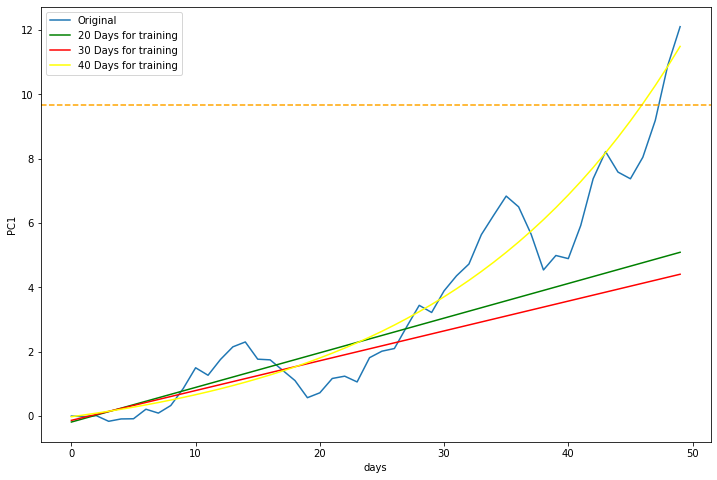

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize = (12,8))
warnings.filterwarnings('ignore')
sns.lineplot(Health_indictor['days'], Health_indictor['PC1'], label="Original")
sns.lineplot(Health_indictor['days'], y_pred20,color= 'green', label="20 Days for training")
sns.lineplot(Health_indictor['days'], y_pred30,color= 'red', label="30 Days for training")
sns.lineplot(Health_indictor['days'], y_pred40,color= 'yellow', label="40 Days for training")
plt.axhline(y=Health_indictor['PC1'].max()*0.8,ls='--',color='orange')
plt.legend()
plt.show()
#plt.savefig('C:/Users/Rajam/OneDrive/Documents/Raja/Fall-2021/Final_exam/after_downsampling.png',bbox_inches ='tight')

In [31]:
def prediction_function(x) :
    def monoExp(t, phi, theta, beta):
        return  phi+theta * np.exp(-t*beta)
    g=[1,1,-1]
    data=Health_indictor.head(x)
    #print(data)
    n=Health_indictor.shape[0]
    y_pred=np.empty(n)
    for i in range(n):
        c,cov=curve_fit(monoExp,data['days'],data['PC1'],g,maxfev = 5000)
        g=c
        y_pred[i]=monoExp(Health_indictor.loc[i,'days'],c[0],c[1],c[2])
    return y_pred


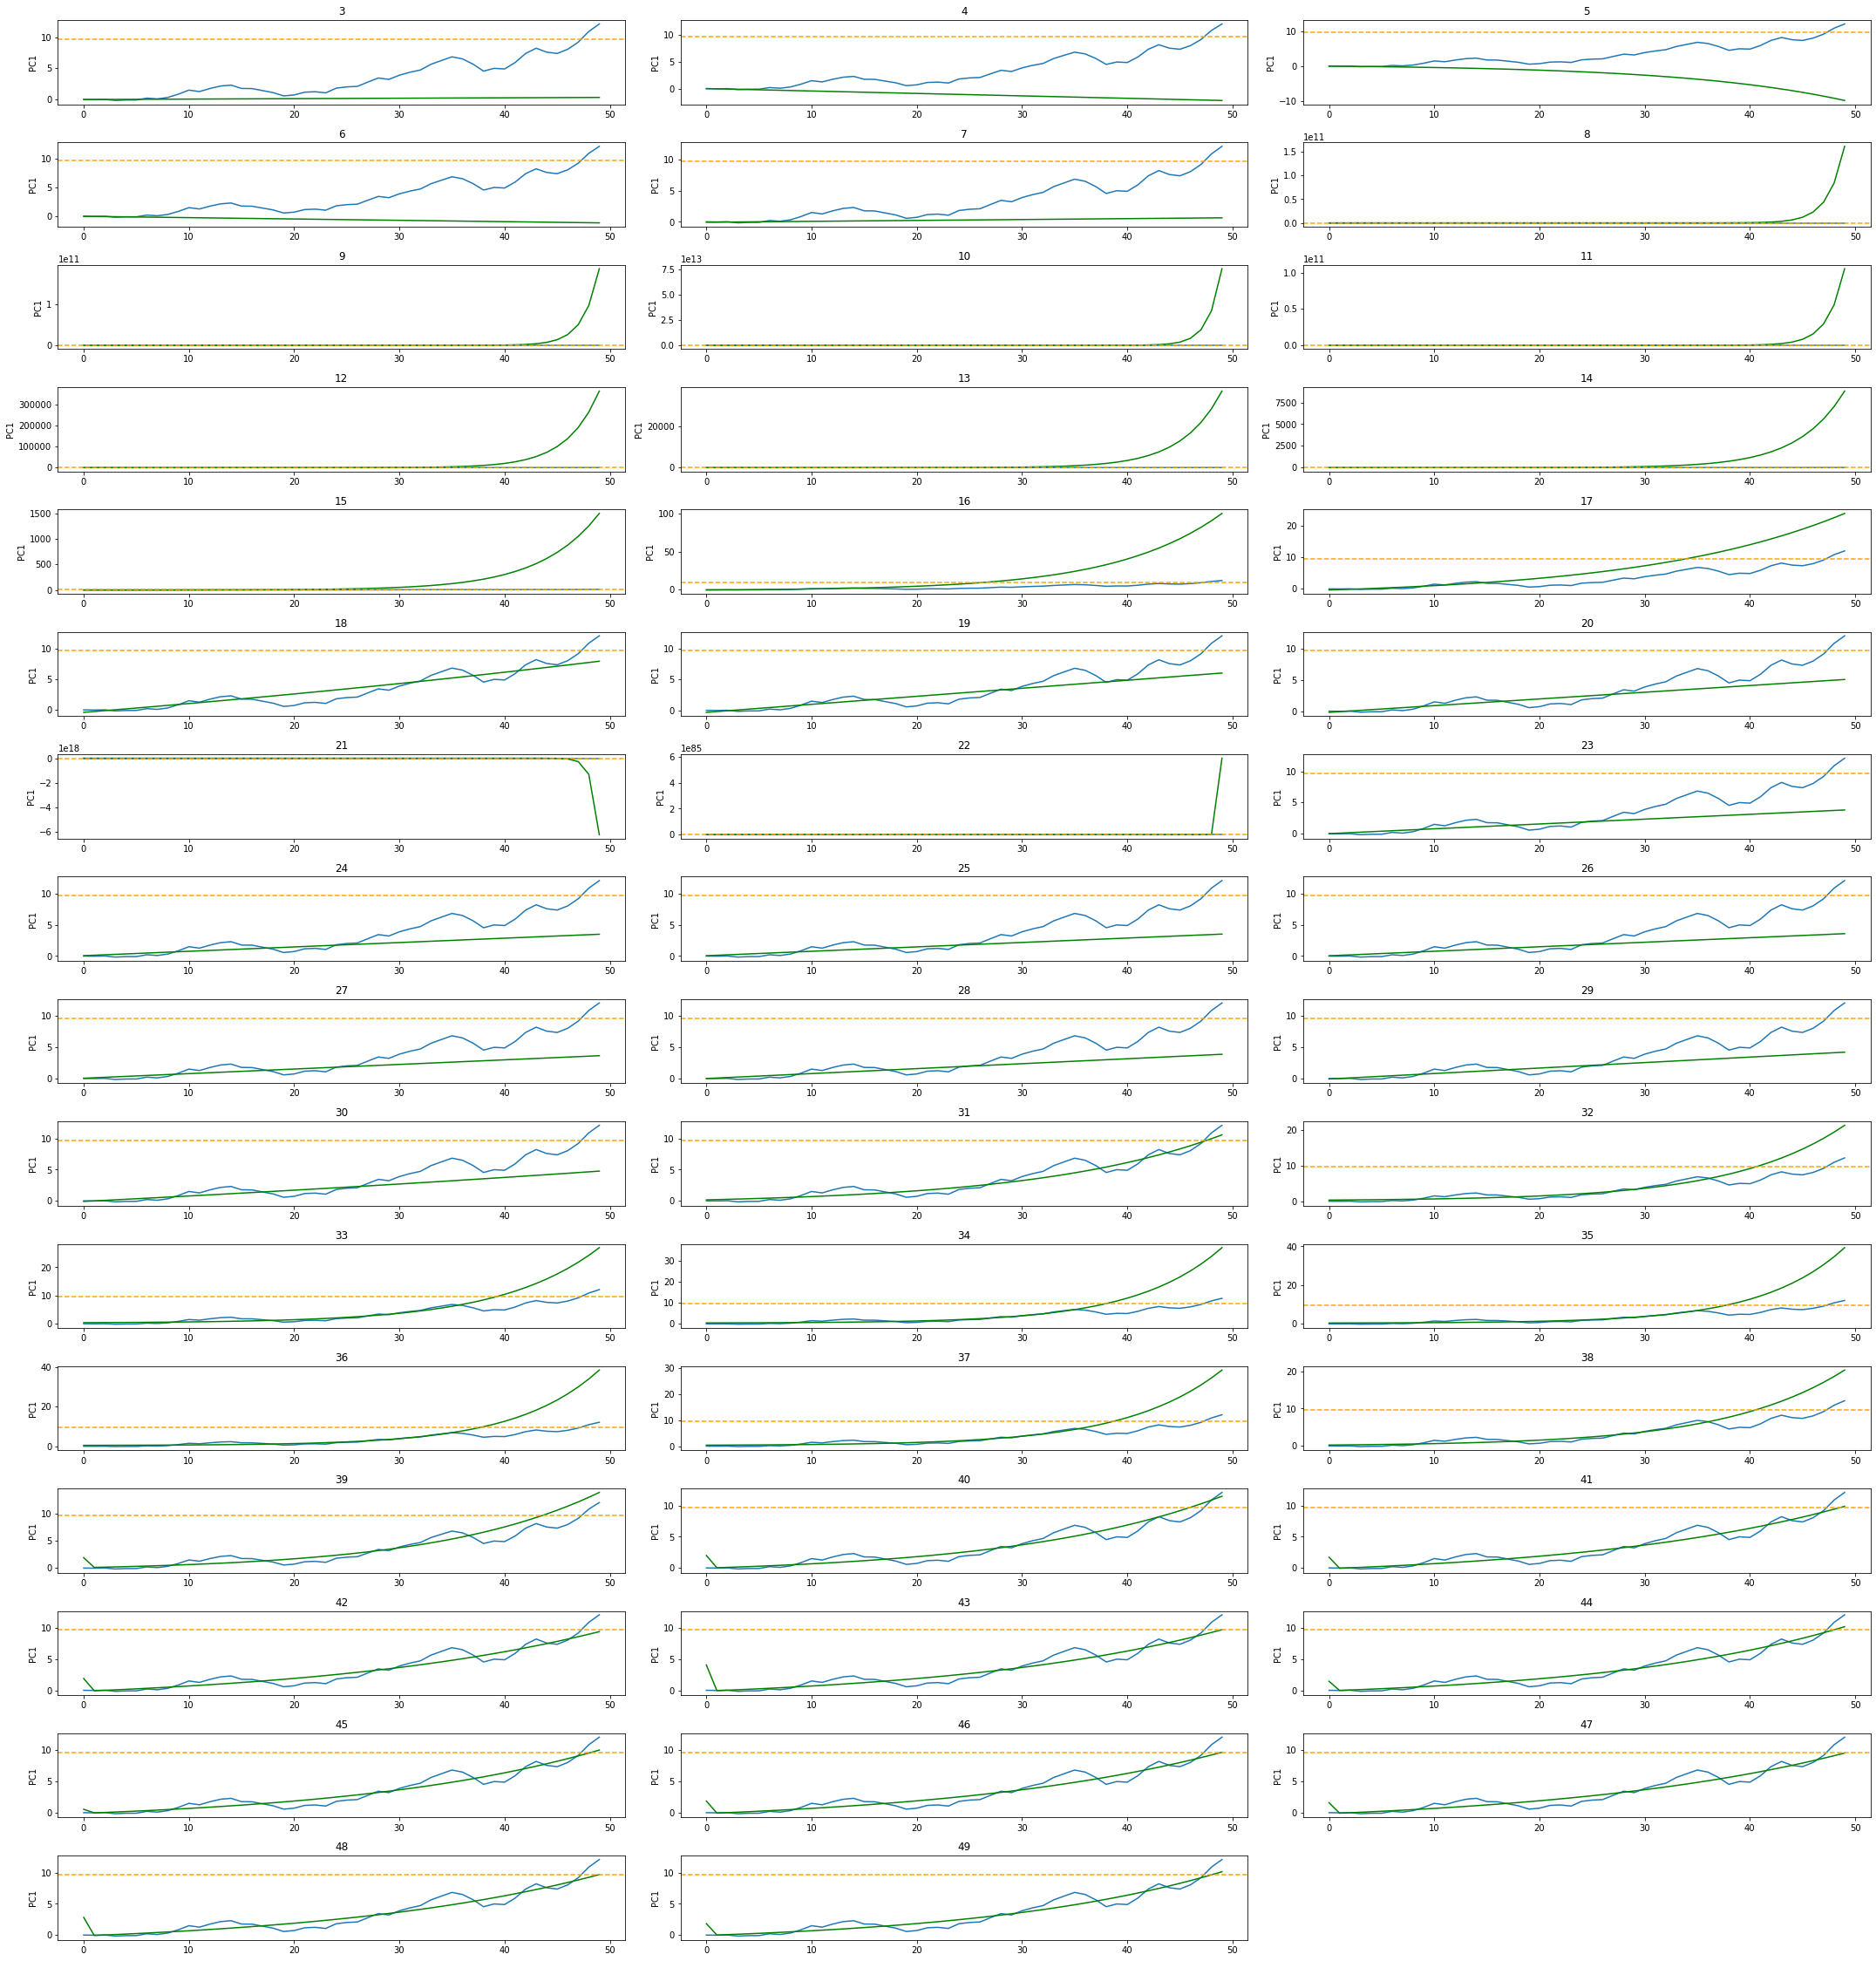

In [34]:
plt.figure(figsize=(30,35))
for i in range(3,50):
    plt.subplot(18,3,i-2)
    warnings.filterwarnings('ignore')
    ax=sns.lineplot(Health_indictor['days'], Health_indictor['PC1'])
    ax=sns.lineplot(Health_indictor['days'], prediction_function(i),color= 'green')
    plt.title(i) 
    plt.axhline(y=Health_indictor['PC1'].max()*0.8,ls='--',color='orange')
    plt.tight_layout()
    ax.set_xlabel('')